# Linear discriminant analysis

## Discriminative vs. Generative classifiers/models
** *Based on Murphy 2022 (9.4) and Bishop 2006 (1.5.4)*  


**Inference and decision**

Classification problems can be broken into two separate stages:

1. Inference stage: We use training data to learn a model for $p(y=c|x)
2. Decision stage: We use the posterior probabilities to make optimal class asignements

An alternative possibility is to solve both problems together and simply learn a function that maps inputes $x$ directly into decisions. Such a fuction is called a disciminant function. 

**General problem:**

$
\begin{aligned}
p(y=c|x;\theta) = \frac{p(x|y=c;\theta)p(y=c;\theta)}{\sum_{c'}^{}p(x|y=c';\theta)}
\end{aligned}
$

## Generative classifiers

$
\begin{aligned}
p(x,y) = p(y)p(x|y)
\end{aligned}
$

This is a generative classifier because it specifies a way to generate the features x for each class c by sampling from $p(x|y=c;\theta)$. Approaches that exlicitly or implicitly model the distribution of inputs as well as outputs are called generative models, because by sampling from them it is possible to generate synthetic data points in the input space. 

**Pros:**
- Often easy to fit (e.g., naive Bayes).
- Allows for the marginal density of the data $p(x)$ to be estimated, which is useful for detecting new data points that have low probability under the model (outliers or novelty). 
- Easy to handle missing data
- Can handle unlabelled training data in a semi-supervised setting in which only some of the data is labelled.   

**Cons:**
- The most demanding because it involves finding the joint distribution over features and classes $p(x,C)$. This is dificult when x is high dimensional, and thus requires a large training set. Class priors $p(C)$ are also required, but they can easily be estimatesd from the fractions of the training set. 
- Can be a waste of computational resources to compute the joint distribution $p(x,C)$ when we just need posterior probabilities fro clasisfication. Class-conditional densities may contain a lot of structure that has little effect on the posterior probabilities. 


**Examples of Generative Models**
- Naive Bayes
- Bayesian networks
- Markov random fields
- Hidden Markov Models (HMMs)
- Latent Dirichlet Allocation (LDA)
- Generative Adversarial Networks (GANs)
- Autoregressive Model




## Discriminative classifiers

$
\begin{aligned}
p(y|x)
\end{aligned}
$

Approaches that directly model the posterior probabilities $p(y=c|x;\theta)$.

These models first sovle the inference problem of computing the posterior, and then use decision theory to asign each new $x$ to one of the classes. 

**Pros:** 
- Often more accurate than generative classifiers. The reason is that the conditional distribution is often much simpler than the joint (see the example below)
- Can handle preprocessed data (e.g., polynomial expanstion of the input features). This is harder with generative models. 

**Cons:**

**Examples of Discriminative Models**
- Logistic regression
- Support vector machines (SVMs)
- Traditional neural networks
- Nearest neighbor
- Conditional Random Fields (CRFs)
- Decision Trees and Random Forest






## Example: generative vs. discriminative classifiers

The conditional distribution $p(y|x)$ is often much simpler than the joint distribution $p(y,x). Thus, discirminative models do not need to waste effort modeling the distribution of the input features. 

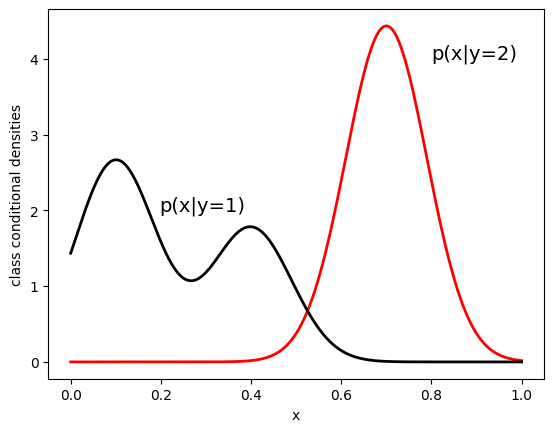

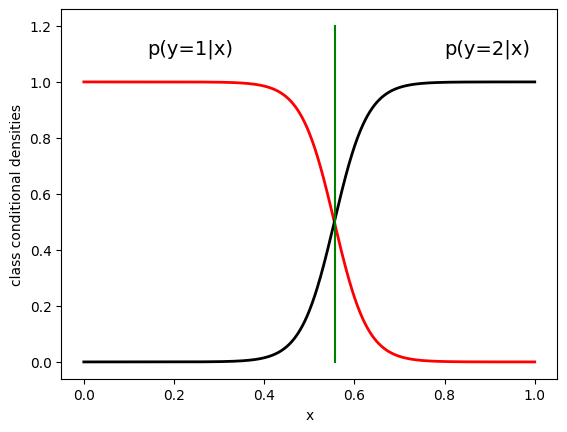

In [5]:
import numpy as np
from numpy.random import laplace
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

domain = np.arange(0, 1.001, 0.001)

def f1(x):
    return multivariate_normal.pdf(x, 0.7, 0.09**2)

def f2(x):
    return 0.6 * multivariate_normal.pdf(x, 0.1, 0.09**2) + 0.4 * multivariate_normal.pdf(x, 0.4, 0.09**2)

plt.plot(domain, f1(domain), "r-", linewidth=2)
plt.plot(domain, f2(domain), "k-", linewidth=2)
plt.xlabel("x")
plt.ylabel("class conditional densities")
plt.annotate("p(x|y=1)", (0.196, 2), fontsize=14)
plt.annotate("p(x|y=2)", (0.8, 4), fontsize=14)
plt.show()

domain = np.arange(0, 1.001, 0.001)

def f1(x):
    return 1 / (1 + np.exp((27 * x - 15)))

def f2(x):
    return 1 / (1 + np.exp((-27 * x + 15)))

plt.plot(domain, f1(domain), "-r", linewidth=2)
plt.plot(domain, f2(domain), "-k", linewidth=2)
plt.xlabel("x")
plt.ylabel("class conditional densities")
plt.plot([0.556, 0.556], [0, 1.2], "-g")
plt.annotate("p(y=1|x)", (0.14, 1.1), fontsize=14)
plt.annotate("p(y=2|x)", (0.8, 1.1), fontsize=14)
plt.show()

## Linear discriminant analysis

This is a generative model (confusing naming).   

If we choose the class conditional densities in a special way, we will see that the resulting posterior over classses is a linear fucntion of $x$: $ logp(y=c|x;\theta) = w^Tx + const$. Where $w$ is derives from $\theta$. This is why the method is called linear discriminant analysis.
